In [103]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline

Zad1

866

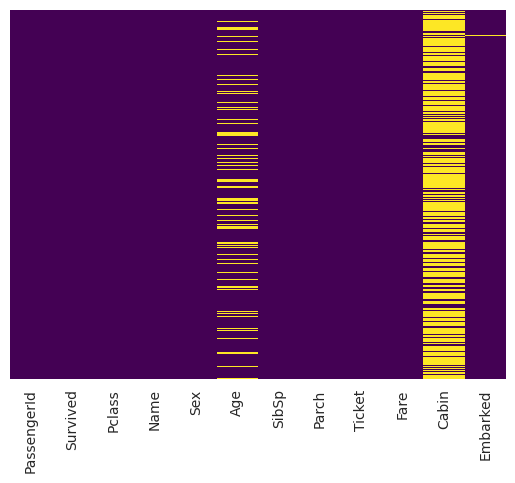

In [104]:
df = pd.read_csv('datasets/DSP_6.csv')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.isnull().sum().sum()

zad2

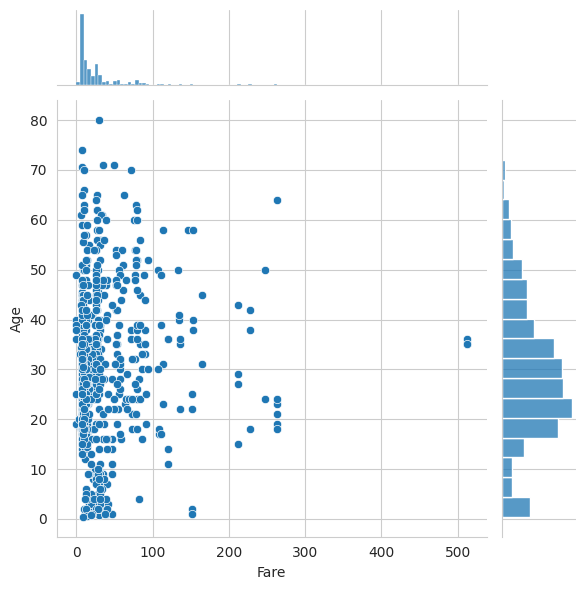

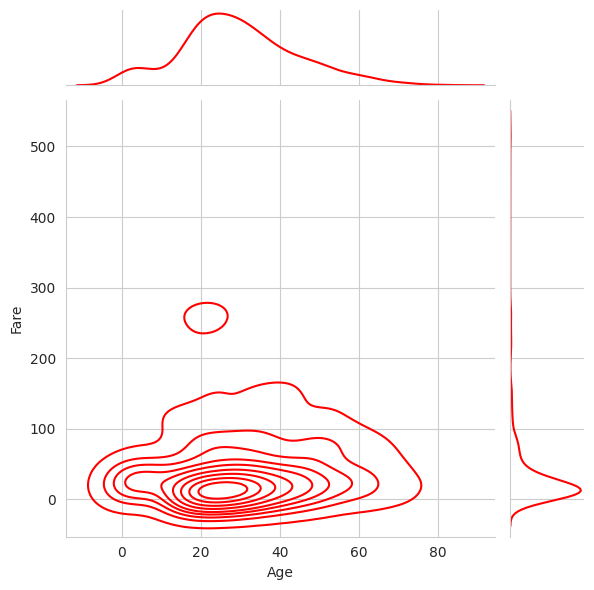

In [105]:
df = pd.read_csv('datasets/DSP_6.csv')
sns.jointplot(x='Fare', y='Age',data=df)
sns.jointplot(x='Age', y='Fare',data=df,color='red',kind='kde')

<Axes: xlabel='Survived', ylabel='count'>

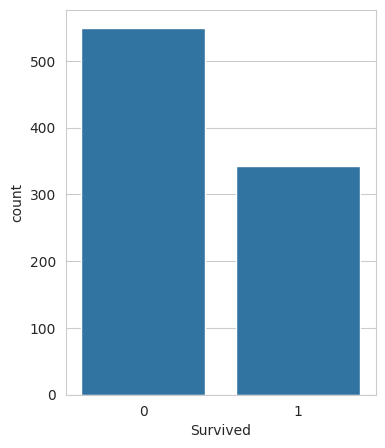

In [106]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(4, 5))
sns.countplot(x='Survived',data=df,ax=ax)

Zad3

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('datasets/DSP_6.csv')
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)
df.drop(['Sex','Name','Ticket','Cabin','Embarked','PassengerId'],axis=1,inplace=True)
df = pd.concat([df,sex,embark],axis=1)
df['Age'] = df['Age'].fillna(df['Age'].mean())
cols = ['Age', 'Fare']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[condition]
y = df['Survived']
df = df.drop(['Survived'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)
lr = LogisticRegression()
lr.fit(X_train,y_train)
predict = lr.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       143
           1       0.73      0.70      0.72        74

    accuracy                           0.81       217
   macro avg       0.79      0.78      0.79       217
weighted avg       0.81      0.81      0.81       217



/home/kacper/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [117]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=12)
lr = LogisticRegression(random_state=200,max_iter=1000)
lr.fit(X_train,y_train)
predict = lr.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        92
           1       0.67      0.60      0.63        53

    accuracy                           0.74       145
   macro avg       0.73      0.71      0.72       145
weighted avg       0.74      0.74      0.74       145



Zmieniają się wartości, przy mniejszym test size model zwraca gorsze wyniki

#Zad4

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('datasets/DSP_2.csv')
sex = pd.get_dummies(df['Sex'],drop_first=True)
pain = pd.get_dummies(df['ChestPainType'],drop_first=True)
ecg = pd.get_dummies(df['RestingECG'],drop_first=True)
ang = pd.get_dummies(df['ExerciseAngina'],drop_first=True)
slope = pd.get_dummies(df['ST_Slope'],drop_first=True)
df = pd.concat([df,sex,pain,ecg,ang,slope],axis=1)
df.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1,inplace=True)
x = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)
lr = LogisticRegression(max_iter=2000)
lr.fit(x_train,y_train)
predict = lr.predict(x_test)
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       126
           1       0.84      0.88      0.86       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276

[[101  25]
 [ 18 132]]


Model cechuje się dobrymi parametrami, F-score jest wysokie, jednakże zasugerowałbym że w przypadku medycznym, jest zbyt dużo fałszywie negatywnych wyników co może zadecydować o życiu pacjenta.